In [ ]:
import re
import json

def extract_json_fields(value):
    extracted = {}
    match = re.search(r"```json\s*(\{.*?\})\s*```", value, re.DOTALL)
    if match:
        try:
            json_str = match.group(1)
            json_str_clean = re.sub(r"//.*", "", json_str)
            extracted = json.loads(json_str_clean)
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON: {e}")
    else:
        print(f"No JSON found")
    
    return extracted

In [2]:
def normalize_to_list(x):
    if isinstance(x, list):
        return [str(i) for i in x]
    elif isinstance(x, dict):
        return [f"{k}: {v}" for k, v in x.items()]
    elif isinstance(x, str):
        return [x]
    else:
        return [str(x)]
    
label2label = {'0': "The action is immoral", '1': "The action is moral", '2': "It is difficult to find the right thing to do", 0: "The action is immoral", 1: "The action is moral", 2: "It is difficult to find the right thing to do"}

In [3]:
reasoning_phases_name = [
    "Problem Identification",
    "Stakeholder Analysis",
    "Context Evaluation",
    "Gather Information",
    "Consequence Weighing",
    "Ethical Framework Application",
    "Intent Evaluation",
    "Principle Prioritization",
    "Option Generation",
    "Scenario Simulation",
    "Integrity Check",
    "Consultation",
    "Decision Articulation",
    "Implementation Strategy",
    "Reflection and Review"
]

ethical_framework_name = [
    "Utilitarianism",
    "Deontology",
    "Virtue Ethics",
    "Ethical Egoism",
    "Care Ethics",
    "Social Contract Theory",
    "Rights-Based Ethics",
    "Moral Relativism",
    "Divine Command Theory",
    "Natural Law Theory"
]

In [ ]:
import os
import json
import re
from tqdm import tqdm
import pandas as pd

file_paths = ["/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/MoralExceptQAResults/"]#, "/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/EthicsResults_CS/", "/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/EthicsResults_Deo/", "/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/EthicsResults_Justice/", "/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/EthicsResults_Util/", "/shared/2/projects/moral-project/ReasoningProbing/LLMasJudge/EthicsResults_Virtue/"]
model_names = ["3_2", "3_1", "OLMo-2", "Phi", "Mistral", "Qwen2_5", "deepseek"]

all_reasoning_phases = []
all_ethical_frameworks = []
all_file_info = []

for file_path in file_paths:
    for file in tqdm(os.listdir(file_path)):
        modelFound = False
        for model in model_names:
            if model in file:
                modelFound = True
                break
        if not modelFound:
            continue
        
        print("Working for file: ", file)
        
        with open(f"{file_path}/{file}", "r") as f:
            data = json.load(f)
            
        reasoning_phases_dist = []
        ethical_framework_dist = []
        
        for instance in data:
            action = label2label[instance['parsed_answer']]
            try:
                scenario = instance['question'] + action
            except:
                scenario = instance['scenario'] + action
                
            thought_process = normalize_to_list(instance['thought_process'])
            reasoning_part = normalize_to_list(instance['reasoning'])
            reasoning = thought_process + reasoning_part
            reasoning = " ".join(reasoning)
            
            reasoning_phases = extract_json_fields(instance["reasoning_phases"])
            reasoning_phases = [k for k, v in reasoning_phases.items() if isinstance(v, str) and re.match(r'^\d+-\d+$', v)]
            reasoning_phases = list(set(reasoning_phases).intersection(set(reasoning_phases_name)))
            reasoning_phases_dist.append(reasoning_phases)
            
            ethical_framework = extract_json_fields(instance["ethical_framework"])
            try:
                ethical_framework_dist.append(list(ethical_framework.values())[0])
            except:
                continue
        
        for i, (phases, framework) in enumerate(zip(reasoning_phases_dist, ethical_framework_dist)):
            all_reasoning_phases.append(phases)
            all_ethical_frameworks.append(framework)
            all_file_info.append({
                'file_name': file,
                'file_path': file_path,
                'instance_id': i
            })

df_consolidated = pd.DataFrame({
    'file_name': [info['file_name'] for info in all_file_info],
    'file_path': [info['file_path'] for info in all_file_info],
    'instance_id': [info['instance_id'] for info in all_file_info],
    'reasoning_phases': all_reasoning_phases,
    'ethical_framework': all_ethical_frameworks
})

# df_consolidated.to_csv("OLMo_consolidated_results.csv", index=False)
# print(f"Consolidated DataFrame shape: {df_consolidated.shape}")
# print(f"Number of unique files processed: {df_consolidated['file_name'].nunique()}")
# print("Files processed:", df_consolidated['file_name'].unique())

  6%|▋         | 3/48 [00:00<00:01, 28.67it/s]

Working for file:  binary_eval_results_German_meta-llama_Llama-3_2-3B-Instruct.json
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Working for file:  binary_eval_results_Chinese_mistralai_Mistral-7B-Instruct-v0_3.json
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
No JSON found
Working for file:  binary_eval_results_Chinese_allenai_OLMo-2-0325-32B-Instruct.json
No JSON found
Error decoding JSON: Expecting ':' delimiter: line 3 column 49 (char 96)
Working for file:  parsed_binary_eval_results_Urdu_deepseek-ai_DeepSeek-R1-Distill-Llama-8B.json
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 col

 19%|█▉        | 9/48 [00:00<00:01, 25.95it/s]

Error decoding JSON: Expecting property name enclosed in double quotes: line 17 column 1 (char 673)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Working for file:  binary_eval_results_German_deepseek-ai_DeepSeek-R1-Distill-Llama-8B.json
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Working for file:  binary_eval_results_German_Qwen_Qwen2_5-7B-Instruct.json
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Working for file:  binary_eval_results_scenario_Qwen_Qwen2_5-7B-Instruct.json
No JSON found
No JSON found
No JSON found
Working for 

 31%|███▏      | 15/48 [00:00<00:01, 23.24it/s]

No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
Working for file:  binary_eval_results_scenario_meta-llama_Llama-3_1-8B-Instruct.json
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Working for file:  binary_eval_results_scenario_meta-llama_Llama-3_2-3B-Instruct.json
Working for file:  binary_eval_results_Urdu_microsoft_Phi-4-mini-instruct.json
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding

 38%|███▊      | 18/48 [00:00<00:01, 25.03it/s]

Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Working for file:  binary_eval_results_Hindi_allenai_OLMo-2-0325-32B-Instruct.json
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting

 54%|█████▍    | 26/48 [00:00<00:00, 27.92it/s]

No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Working for file:  binary_eval_results_scenario_microsoft_Phi-4-mini-instruct.json
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting property name enclosed in double quotes: line 17 column 1 (char 578)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Working for file:  parsed_binary_eval_results_Chinese_deepseek-ai_DeepSeek-R1-Distill-Llama-8B.json
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 col

 69%|██████▉   | 33/48 [00:01<00:00, 26.89it/s]

No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Working for file:  binary_eval_results_Hindi_meta-llama_Llama-3_1-8B-Instruct.json
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Working for file:  binary_eval_results_Spanish_allenai_OLMo-2-0325-32B-Instruct.json
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Working for file:  binary_eval_results_German_allenai_OLMo-2

 77%|███████▋  | 37/48 [00:01<00:00, 27.75it/s]

Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 2

 92%|█████████▏| 44/48 [00:01<00:00, 26.89it/s]

Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
Working for file:  binary_eval_results_scenario_mistralai_Mistral-7B-Instruc

100%|██████████| 48/48 [00:01<00:00, 26.92it/s]

No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting property name enclosed in double quotes: line 17 column 1 (char 642)
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
Error decoding JSON: Expecting value: line 3 column 11 (char 29)
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found
No JSON found


In [5]:
import pandas as pd

def extract_language(file_name):
    languages = ['Chinese', 'English', 'German', 'Hindi', 'Spanish', 'Urdu']
    for lang in languages:
        if lang.lower() in file_name.lower():
            return lang
    if "scenario" in file_name:
        return "English"
    print("file_name: ", file_name)
    return 'Unknown'

df_consolidated['language'] = df_consolidated['file_name'].apply(extract_language)

def concat_lists(series):
    combined = []
    for item in series:
        combined.append(item)
    return combined

agg_df = df_consolidated.groupby('language').agg({
    'reasoning_phases': concat_lists,
    'ethical_framework': concat_lists
}).reset_index()


### Reasoning Phases

In [ ]:
import numpy as np
from collections import Counter

records = []
all_means = []
all_sems = []

for _, row in agg_df.iterrows():
    language = row['language']
    phase_lists = row['reasoning_phases']
    n_instances = len(phase_lists)
    instance_phase_counts = []
    for seq in phase_lists:
        if seq:
            counter = Counter(seq)
            instance_phase_counts.append([counter.get(phase, 0) for phase in reasoning_phases_name])
    instance_phase_counts = np.array(instance_phase_counts)
    phase_totals = instance_phase_counts.sum(axis=1, keepdims=True)
    with np.errstate(divide='ignore', invalid='ignore'):
        instance_phase_freqs = np.divide(instance_phase_counts, phase_totals, where=phase_totals!=0)
        instance_phase_freqs = np.nan_to_num(instance_phase_freqs)
    means = instance_phase_freqs.mean(axis=0)
    all_means.append(means)

all_means_arr = np.vstack(all_means)
global_min = all_means_arr.min()
global_max = all_means_arr.max()

if global_max - global_min == 0:
    def standardize(x): return np.zeros_like(x)
else:
    def standardize(x): return (x - global_min) / (global_max - global_min)

idx = 0
for _, row in agg_df.iterrows():
    language = row['language']
    means = all_means[idx]
    means_std = standardize(means)
    for i, phase in enumerate(reasoning_phases_name):
        records.append({
            'language': language,
            'phase': phase,
            'frequency': means_std[i]
        })
    idx += 1

freq_df_long = pd.DataFrame(records)
freq_df_long['phase'] = pd.Categorical(freq_df_long['phase'], categories=reasoning_phases_name, ordered=True)

In [8]:
freq_df_long

,language,phase,frequency
0,Chinese,Problem Identification,0.843878
1,Chinese,Stakeholder Analysis,0.714640
2,Chinese,Context Evaluation,0.717051
3,Chinese,Gather Information,0.179716
4,Chinese,Consequence Weighing,0.700998
...,...,...,...
85,Urdu,Integrity Check,0.289549
86,Urdu,Consultation,0.004839
87,Urdu,Decision Articulation,0.399174
88,Urdu,Implementation Strategy,0.009629


In [ ]:
def normalize_phase_values(df, value_col='frequency', group_col='phase', min_val=0.1, max_val=1.0):
    df = df.copy()
    def norm_func(x):
        x_min = x.min()
        x_max = x.max()
        if x_max - x_min == 0:
            return np.full_like(x, min_val, dtype=np.float64)
        else:
            return min_val + (x - x_min) * (max_val - min_val) / (x_max - x_min)
    df['frequency_normalized'] = df.groupby(group_col)[value_col].transform(norm_func)
    return df

freq_df_long = normalize_phase_values(freq_df_long, min_val=0.7)


/tmp/ipykernel_481990/2689123406.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df['frequency_normalized'] = df.groupby(group_col)[value_col].transform(norm_func)


/tmp/ipykernel_481990/2828974291.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = freq_df_long.pivot_table(
/tmp/ipykernel_481990/2828974291.py:50: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap(colormaps[i])


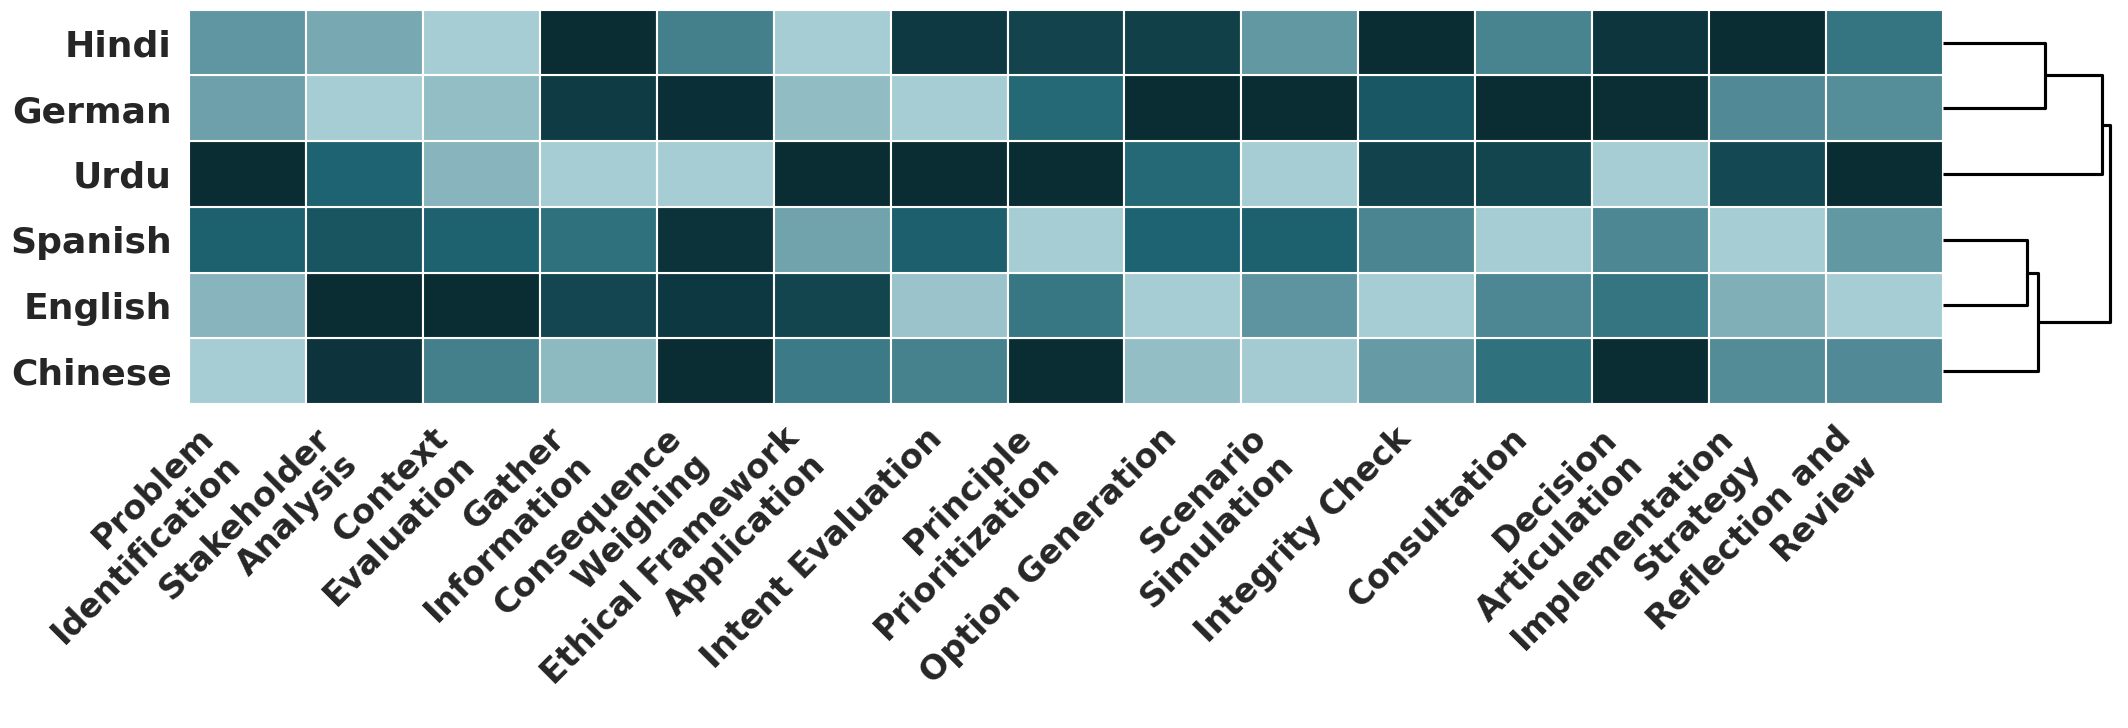

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import to_rgba
import matplotlib as mpl
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list

sns.set_theme(style="whitegrid", context="talk", font_scale=1.7)

heatmap_data = freq_df_long.pivot_table(
    index='language',
    columns='phase',
    values='frequency_normalized',
    aggfunc='mean'
)

if 'reasoning_phases_name' in globals():
    ordered_cols = [col for col in reasoning_phases_name if col in heatmap_data.columns]
    heatmap_data = heatmap_data[ordered_cols]

row_linkage = linkage(heatmap_data.values, method='ward')
row_leaves = leaves_list(row_linkage)
heatmap_data_clustered = heatmap_data.iloc[row_leaves, :]

colors = ["#a7cdd4", "#1E6371", "#0a2c33"]
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("teal_diverging", colors, N=128)

colormaps = [custom_cmap]
while len(colormaps) < heatmap_data.shape[1]:
    colormaps = colormaps * 2

normed = (heatmap_data_clustered - heatmap_data_clustered.min()) / (heatmap_data_clustered.max() - heatmap_data_clustered.min())

color_matrix = np.zeros(heatmap_data_clustered.shape + (4,))
for i, col in enumerate(heatmap_data_clustered.columns):
    cmap = mpl.cm.get_cmap(colormaps[i])
    color_matrix[:, i, :] = cmap(normed[col].values)

fig = plt.figure(figsize=(22, 8))
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 2, width_ratios=[10, 1], wspace=0.0)

ax = fig.add_subplot(gs[0])

ax_dendro = fig.add_subplot(gs[1])
dendro = dendrogram(
    row_linkage,
    orientation='right',
    labels=heatmap_data.index,
    color_threshold=0,
    above_threshold_color='black',
    ax=ax_dendro,
    no_labels=True
)
ax_dendro.set_yticks([])
ax_dendro.set_xticks([])
ax_dendro.axis('off')

for row_idx, row_label in enumerate(heatmap_data_clustered.index):
    for col_idx, col_label in enumerate(heatmap_data_clustered.columns):
        value = heatmap_data_clustered.iloc[row_idx, col_idx]
        color = color_matrix[row_idx, col_idx]
        rect = plt.Rectangle(
            (col_idx, row_idx), 1, 1,
            facecolor=color,
            edgecolor='white',
            linewidth=1.5
        )
        ax.add_patch(rect)

ax.set_xticks(np.arange(len(heatmap_data_clustered.columns)) + 0.5)
ax.set_yticks(np.arange(len(heatmap_data_clustered.index)) + 0.5)
from textwrap import fill

wrapped_labels = [fill(label, 17) for label in heatmap_data_clustered.columns]
ax.set_xticklabels(wrapped_labels, rotation=45, ha='right', fontsize=24, fontweight='bold')

ax.set_yticklabels(heatmap_data_clustered.index, rotation=0, fontsize=26, fontweight='bold')
ax.tick_params(axis='y', left=True, labelleft=True)

ax.set_xlim(0, len(heatmap_data_clustered.columns))
ax.set_ylim(0, len(heatmap_data_clustered.index))

for spine in ax.spines.values():
    spine.set_visible(False)
ax.tick_params(left=False, bottom=False)

ax.set_xlabel('')
ax.set_ylabel('')

plt.tight_layout()
plt.savefig("FinalPlots/reasoning_phases_by_language_meq_heatmap.pdf", bbox_inches='tight')
plt.show()


### Ethical Frameworks

In [ ]:
import numpy as np
import pandas as pd

def aggregate_frameworks(list_of_lists):
    filtered = [x for x in list_of_lists if len(x) > 0]
    if not filtered:
        return np.zeros(len(ethical_framework_name))
    arr = np.array(filtered)
    return np.mean(arr, axis=0)

agg_df['ethical_framework_mean'] = agg_df['ethical_framework'].apply(aggregate_frameworks)

In [ ]:
framework_df = pd.DataFrame(
    agg_df['ethical_framework_mean'].tolist(),
    columns=ethical_framework_name,
    index=agg_df['language']
).reset_index()

framework_df_std = framework_df.copy()
framework_cols = [col for col in framework_df_std.columns if col != 'language']
framework_df_std[framework_cols] = 0.9 * (framework_df_std[framework_cols] - framework_df_std[framework_cols].min()) / (framework_df_std[framework_cols].max() - framework_df_std[framework_cols].min()) + 0.1
framework_df_std

,language,Utilitarianism,Deontology,Virtue Ethics,Ethical Egoism,Care Ethics,Social Contract Theory,Rights-Based Ethics,Moral Relativism,Divine Command Theory,Natural Law Theory
0,Chinese,0.814090,0.554898,0.696865,0.100000,1.000000,0.723872,0.995670,0.378687,0.212188,1.000000
1,English,1.000000,1.000000,0.266336,0.775499,0.139790,1.000000,0.940602,0.100000,0.100000,0.648568
2,German,0.756623,0.613814,0.100000,0.260043,0.690529,0.712718,1.000000,0.240484,0.276764,0.843618
3,Hindi,0.164103,0.840779,0.668682,0.675648,0.252960,0.454213,0.339087,0.403596,1.000000,0.531224
4,Spanish,0.572533,0.695269,0.234890,0.133134,0.667490,0.599288,0.718994,1.000000,0.435534,0.749131
5,Urdu,0.100000,0.100000,1.000000,1.000000,0.100000,0.100000,0.100000,0.469931,0.914767,0.100000


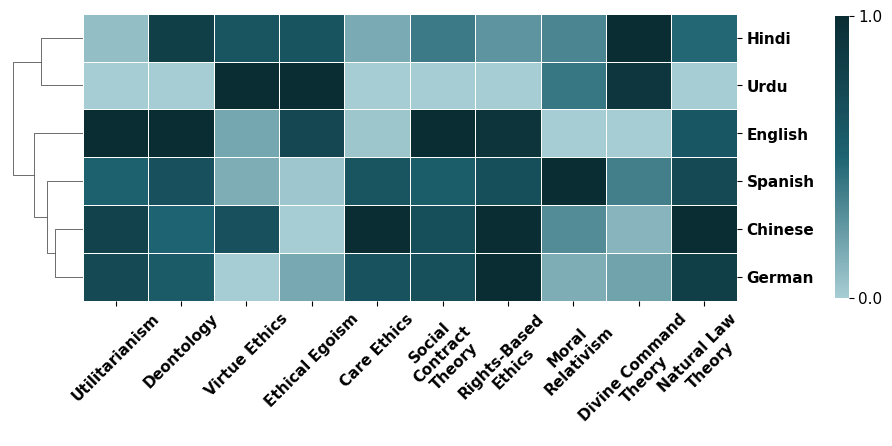

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_indexed = framework_df_std.set_index('language')

colors = ["#a7cdd4", "#1E6371", "#0a2c33"]
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("teal_diverging", colors, N=128)


g = sns.clustermap(
    df_indexed,
    cmap=custom_cmap,
    standard_scale=1, 
    metric='euclidean', 
    method='average', 
    linewidths=0.7,
    linecolor='white',
    figsize=(8, 5),
    annot=False,
    dendrogram_ratio=(.10, 0),
    col_cluster=False  
)

from textwrap import fill

wrapped_labels = [fill(label.get_text(), 14) for label in g.ax_heatmap.get_xticklabels()]
g.ax_heatmap.set_xticklabels(wrapped_labels, rotation=45, ha='center', fontsize=11, fontweight='bold')
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize=11, fontweight='bold')

g.ax_heatmap.set_ylabel("")
g.cax.set_position([1.05, 0.4, 0.017, 0.565])
g.cax.set_axis_on()

from matplotlib import colorbar
cbar = plt.colorbar(g.ax_heatmap.collections[0], cax=g.cax, orientation='vertical')
for spine in cbar.ax.spines.values():
    spine.set_visible(False)

cbar.set_ticks([0.0, 1.0])
cbar.set_ticklabels(['0.0', '1.0'])
cbar.ax.tick_params(labelsize=11, width=0.8, labelcolor='black', axis='y')

cbar.ax.yaxis.label.set_color('black')
for label in cbar.ax.get_yticklabels():
    label.set_color('black')

plt.savefig("FinalPlots/clustered_heatmap_ethics_by_language_meq.pdf", bbox_inches='tight', dpi=300)
plt.show()
